In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node, NodeWhile

In [2]:
def add(x, y):
    print(f"add({x}, {y})")
    return x + y

# Condition function for the while loop
def cond_func(loop_var, y):
    print(f"{loop_var=}, {y=}, ")
    return loop_var <= y

In [ ]:
# Create a pipeline
pipeline = Pipeline("For Loop Test")
# Create a pipeline to be executed in a for loop
while_pipeline = Pipeline("While Loop")

# Add a node to the main pipeline
pipeline.add_node(Node("A", add), predecessors={"x":"run_params:x","y":"run_params:y"})
# Add a node to the for loop pipeline
while_pipeline.add_node(Node("B", add, fixed_params={"x":1}), predecessors={"y":"run_params:loop_var"})
# Add a for loop node to the main pipeline
pipeline.add_node(NodeWhile("While Test", cond_func, while_pipeline, fixed_params={"max_iterations":10, "y":5}), predecessors={"loop_var":"A"})

In [ ]:
print("Topological order:", pipeline.static_order())

Ordre topologique: ['A', 'While Test']


In [ ]:
# Run the pipeline with parameters
outputs = pipeline.run({"x":-3, "y":0}, debug=True)
print("Result:", outputs[1][outputs[0]], "\n" , outputs, "\n")

Executing node: A
add(-3, 0)
Executing node: While Test
loop_var=-3, y=5, 
Executing node: While Test iteration 1
Executing node: B
add(1, -3)
loop_var=-2, y=5, 
Executing node: While Test iteration 2
Executing node: B
add(1, -2)
loop_var=-1, y=5, 
Executing node: While Test iteration 3
Executing node: B
add(1, -1)
loop_var=0, y=5, 
Executing node: While Test iteration 4
Executing node: B
add(1, 0)
loop_var=1, y=5, 
Executing node: While Test iteration 5
Executing node: B
add(1, 1)
loop_var=2, y=5, 
Executing node: While Test iteration 6
Executing node: B
add(1, 2)
loop_var=3, y=5, 
Executing node: While Test iteration 7
Executing node: B
add(1, 3)
loop_var=4, y=5, 
Executing node: While Test iteration 8
Executing node: B
add(1, 4)
loop_var=5, y=5, 
Executing node: While Test iteration 9
Executing node: B
add(1, 5)
loop_var=6, y=5, 
Résultats du pipeline: 6 
 ('While Test', {'A': -3, 'While Test': 6}, (0.0013298988342285156, {'A': 0.0004734992980957031, 'While Test': 0.0008563995361328

In [ ]:
pipeline.to_json("while.json")
print("Json file generated.")

Fichier .json générés.


In [ ]:
print("\nLoading pipeline from JSON and executing:")
# Load the pipeline from a json file
loaded_pipeline = Pipeline.from_json("while.json")
# Run the loaded pipeline
loaded_outputs = loaded_pipeline.run({"x":5, "y":1})
print("Pipeline results loaded from JSON:", loaded_outputs)


Chargement du pipeline depuis JSON et exécution:
add(5, 1)
loop_var=6, y=5, 
Résultats du pipeline chargé en JSON: ('While Test', {'A': 6, 'While Test': 6}, (0.000102996826171875, {'A': 6.651878356933594e-05, 'While Test': 3.647804260253906e-05}))


Fichier .dot et .png généré.


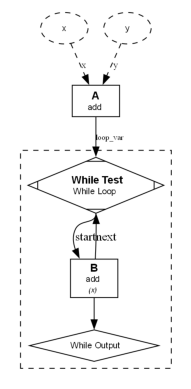

In [8]:
pipeline.to_dot("while.dot")
pipeline.to_image("while.png")
print("Fichier .dot et .png généré.")
plt.axis('off')
plt.imshow(Image.open("while.png"))